In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
# DATE: quarterly dates spanning from 1977 Q1 to 2023 Q4
# GDP: quarterly %change in real gross domestic product (FRED)
# TNF: quarterly %change in total non farm payrolls (FRED)
# UE: quartely %change in unemployment rate (FRED)
# FFR: quarterly %change in federal fund rate (FRED)
# CPI: quarterly %change in consumer price index (FRED)
# YS: quartely yield spread between 10-year and 2-year U.S. Treasury bonds (FRED)
# SP500: quarterly %change in S&P 500 index (Investing.com)
# CSI: quarterly %change in consumer sentiment index (University of Michigan)
# IP: quarterly %change in industrial production index (FRED)
# HP: quarterly %change in house price index (FRED)
# PCE: quarterly %change in personal consumption expenditure (FRED)
# RECESSION: recessions according to NBER (NBER)

In [3]:
df=pd.read_excel(r"C:\Users\Ryan Matthew\Desktop\SSDI\project\recession_masterdata.xlsx")
dfs=df.copy()

In [6]:
# Finding Correlated Features

In [4]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dfs[['GDP', 'TNF', 'UE', 'FFR', 'CPI', 'SP500', 'CSI', 'IP', 'HP', 'PCE','YS']], 0.80)

print(corr_features)

{'TNF', 'UE'}


In [8]:
# Finding Feature Importance

In [5]:
X = dfs.drop(['RECESSION','DATE'], axis = 1)
y = dfs['RECESSION'].astype(int)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10).fit(X,y)

In [6]:
for i,column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

The feature importance for GDP is : 0.0
The feature importance for TNF is : 0.6135935774303218
The feature importance for UE is : 0.05262509285212144
The feature importance for FFR is : 0.12997102379508618
The feature importance for CPI is : 0.0
The feature importance for YS is : 0.13122348899348774
The feature importance for SP500 is : 0.0725868169289828
The feature importance for CSI is : 0.0
The feature importance for IP is : 0.0
The feature importance for HP is : 0.0
The feature importance for PCE is : 0.0


In [11]:
# Visualizing Trends 

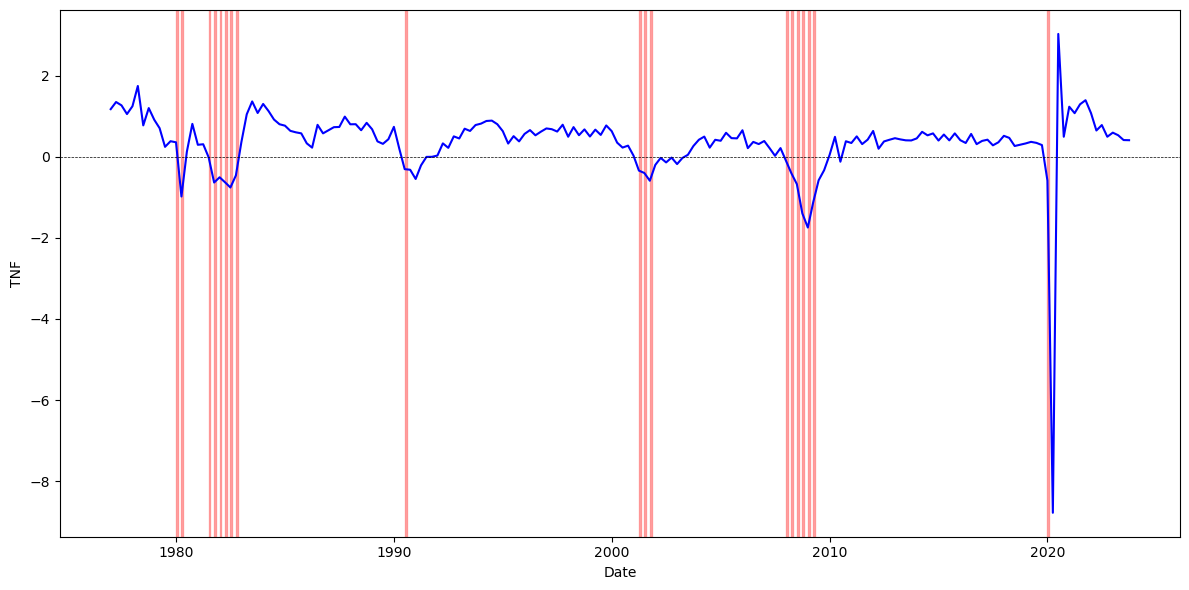

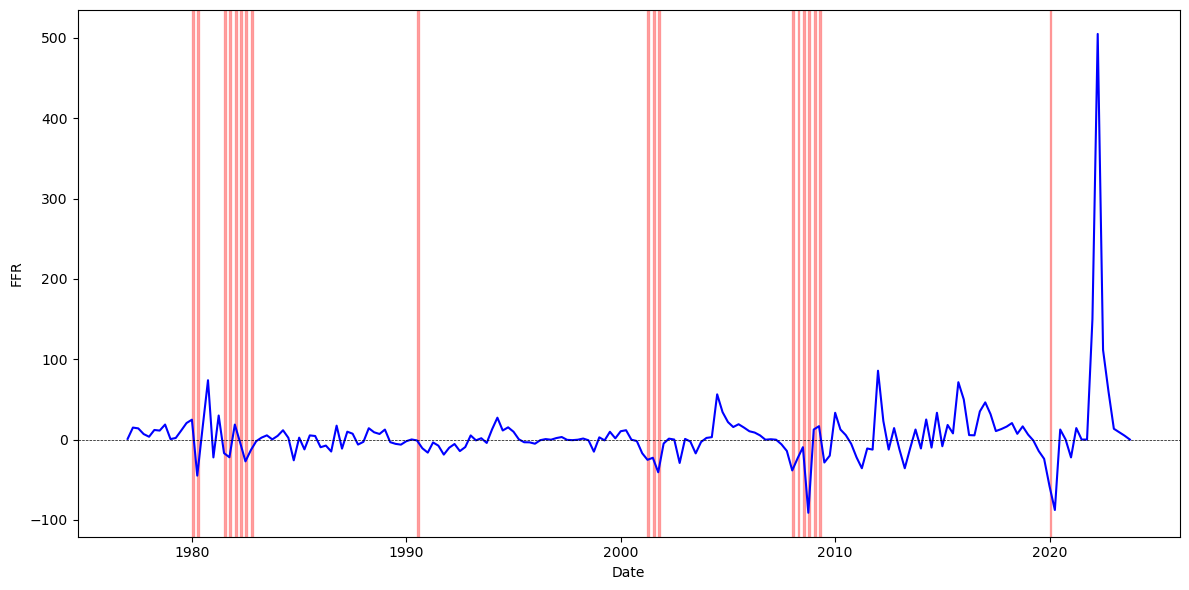

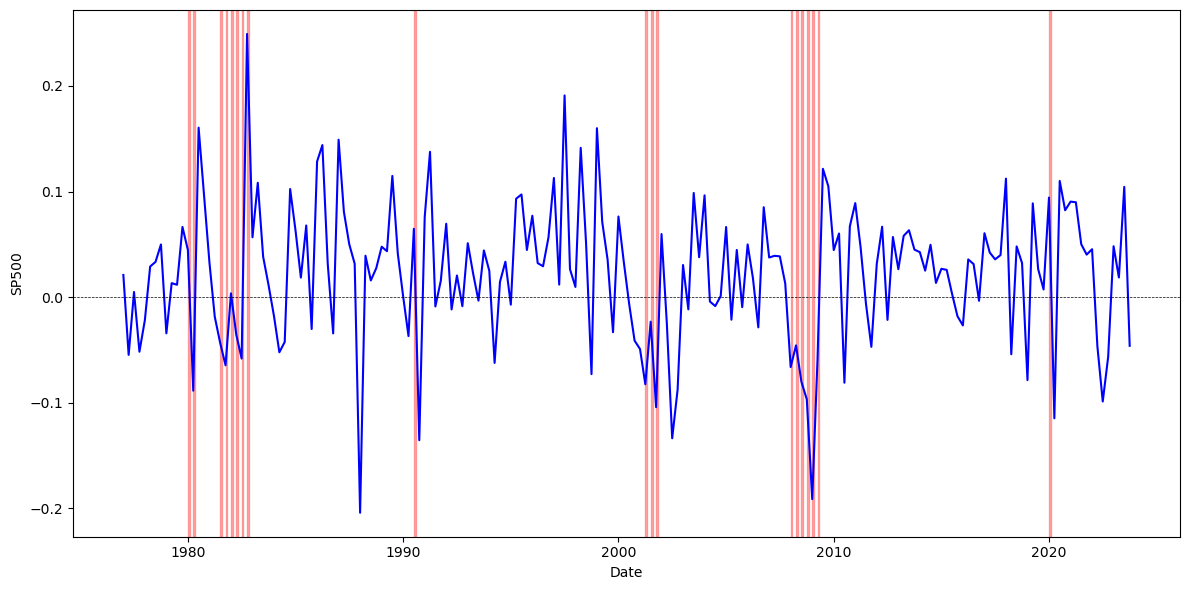

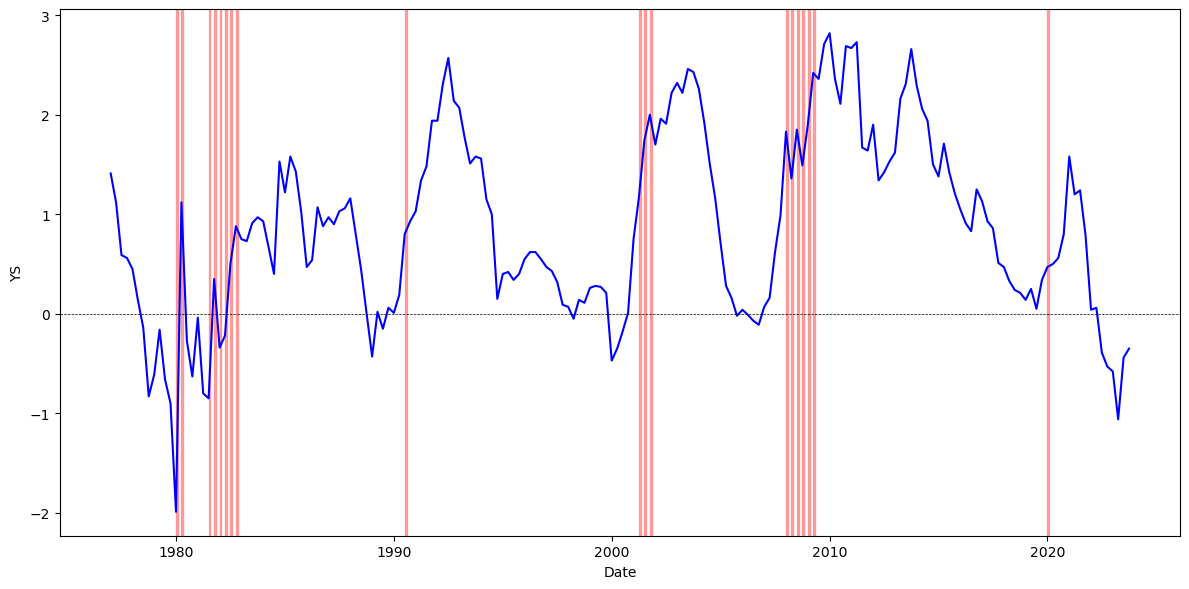

In [15]:
df_recession = dfs[dfs['RECESSION'] == 1]
variables = ['TNF','FFR','SP500','YS']

for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dfs, x='DATE', y=variable, color='blue')
    for recession_date in df_recession['DATE']:
        plt.axvspan(recession_date, recession_date + pd.DateOffset(months=1), color='red', alpha=0.3)
    
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks()
    
    plt.tight_layout()
    plt.show()

In [16]:
# Splitting The Dataset Using A 50:15:35 Train:Validate:Test Split

In [17]:
train=dfs.loc[:95,['TNF','FFR','SP500','PCE','YS','RECESSION','DATE']]
validate=dfs.loc[96:123,['TNF','FFR','SP500','PCE','YS','RECESSION','DATE']]
test=dfs.loc[124:,['TNF','FFR','SP500','PCE','YS','RECESSION','DATE']]

In [18]:
features = ['TNF', 'FFR', 'SP500', 'PCE', 'YS']
target = 'RECESSION'

In [19]:
# Finding The Best Model Using The Train:Validate Split

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

X_train = train[features]
y_train = train[target]
X_validate= validate[features]
y_validate=validate[target]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validate)
    y_pred_prob=model.predict_proba(X_validate)
    accuracy = accuracy_score(y_validate, y_pred)
    recall = recall_score(y_validate, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.8929
Recall: 0.0000

Model: Random Forest
Accuracy: 0.9286
Recall: 0.6667

Model: SVM
Accuracy: 0.9286
Recall: 0.3333

Model: KNN
Accuracy: 0.9286
Recall: 0.3333

Model: Naive Bayes
Accuracy: 0.9286
Recall: 1.0000

Model: Decision Tree
Accuracy: 0.8929
Recall: 0.0000

Model: XGBoost
Accuracy: 0.9643
Recall: 1.0000



In [18]:
# Verifying The Best Model Using Train+Validate:Test Split

In [21]:
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier()
}

df_train = pd.concat([train, validate], axis=0)

X_train = df_train[features]
y_train = df_train[target]
X_test = test[features]
y_test = test[target]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print()


Gaussian Naive Bayes:
Accuracy: 0.9219
Recall: 1.0000

Random Forest:
Accuracy: 0.9531
Recall: 0.8571

XGBoost:
Accuracy: 0.8906
Recall: 0.4286



In [20]:
# Visualising The Predictive Capability Of The Model

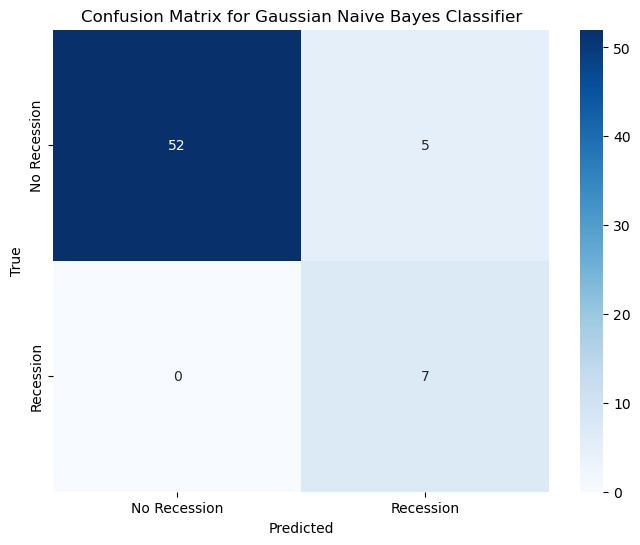

In [22]:
model = GaussianNB()

df_train = pd.concat([train, validate], axis=0)

X_train = df_train[features]
y_train = df_train[target]
X_test = test[features]
y_test = test[target]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

classes = ['No Recession', 'Recession']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

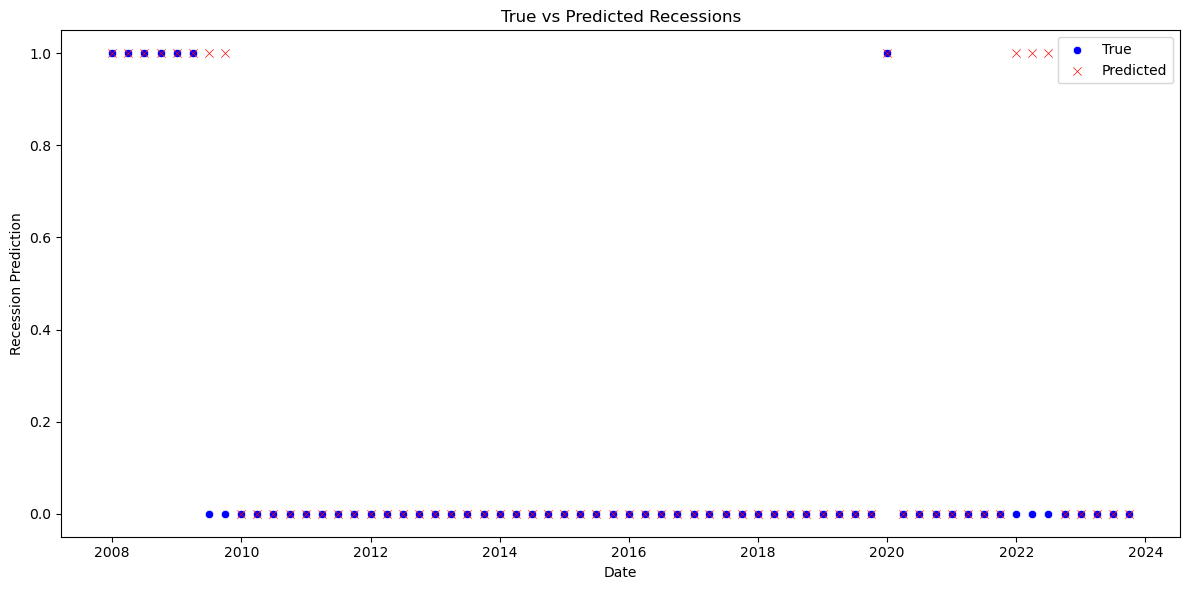

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=test['DATE'], y=y_test, label='True', marker='o', color='blue')
sns.scatterplot(x=test['DATE'], y=y_pred, label='Predicted', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Recession Prediction')
plt.title('True vs Predicted Recessions')
plt.tight_layout()
plt.legend()
plt.show()